## Instalação de dependências externas necessárias

In [1]:
%pip install pandas -q
%pip install matplotlib -q
%pip install seaborn
%pip install numpy
%pip install -U scikit-learn
%pip install yellowbrick
%pip install lightgbm
%pip install imblearn
%pip install lime
%pip install shap
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Carregamento das dependências

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)
import sqlite3
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# from yellowbrick.classifier import ROCAUC
# from yellowbrick.classifier import ConfusionMatrix

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import lime
# import lime.lime_tabular
import shap



# Dicionário de dados

- **Hours_Studied:** Número de horas estudadas por semana.  
- **Attendance:** Percentual de aulas assistidas.  
- **Parental_Involvement:** Nível de envolvimento dos pais na educação do estudante (Baixo, Médio, Alto).  
- **Access_to_Resources:** Disponibilidade de recursos educacionais (Baixo, Médio, Alto).  
- **Extracurricular_Activities:** Participação em atividades extracurriculares (Sim, Não).  
- **Sleep_Hours:** Número médio de horas de sono por noite.  
- **Previous_Scores:** Notas de exames anteriores.  
- **Motivation_Level:** Nível de motivação do estudante (Baixo, Médio, Alto).  
- **Internet_Access:** Disponibilidade de acesso à internet (Sim, Não).  
- **Tutoring_Sessions:** Número de sessões de tutoria frequentadas por mês.  
- **Family_Income:** Nível de renda familiar (Baixo, Médio, Alto).  
- **Teacher_Quality:** Qualidade dos professores (Baixa, Média, Alta).  
- **School_Type:** Tipo de escola frequentada (Pública, Privada).
- **Peer_Influence:** Influência dos colegas no desempenho acadêmico (Positiva, Neutra, Negativa).
- **Physical_Activity:** Número médio de horas de atividade física por semana.
- **Learning_Disabilities:** Presença de dificuldades de aprendizagem (Sim, Não).
- **Parental_Education_Level:** Nível de escolaridade mais alto dos pais (Ensino Médio, Faculdade, - Pós-graduação).
- **Distance_from_Home:** Distância de casa para a escola (Perto, Moderada, Longe).
- **Gender:** Gênero do estudante (Masculino, Feminino).
- **Exam_Score:** Nota final do exame.

## Importação do dataset e criação de DB

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/LSouzaAndrade/TechChallenge3/refs/heads/main/Datasets/StudentPerformanceFactors.csv')
conn = sqlite3.connect('./Datasets/StudentPerformanceFactors.db')
# dataset.to_sql('StudentData', conn, if_exists='replace', index=False)
# conn.close()

In [5]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Data Cleaning

In [4]:
df.shape

(6607, 20)

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [6]:
df.nunique().sort_values()

Extracurricular_Activities     2
Internet_Access                2
Gender                         2
School_Type                    2
Learning_Disabilities          2
Distance_from_Home             3
Parental_Involvement           3
Access_to_Resources            3
Parental_Education_Level       3
Motivation_Level               3
Family_Income                  3
Teacher_Quality                3
Peer_Influence                 3
Sleep_Hours                    7
Physical_Activity              7
Tutoring_Sessions              9
Hours_Studied                 41
Attendance                    41
Exam_Score                    45
Previous_Scores               51
dtype: int64

### Verificando a existencia de duplicados

In [20]:
df.duplicated().sum()

0

### NaN Analysis

In [7]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
df["Parental_Education_Level"].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [9]:
df["Teacher_Quality"].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [10]:
df["Distance_from_Home"].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

Eliminando os valores nulos do dataset

In [11]:
df = df.dropna(subset=["Parental_Education_Level", "Teacher_Quality", "Distance_from_Home"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

## Ajuste do dtypes

In [15]:
df = df.convert_dtypes()
df.dtypes

Hours_Studied                          Int64
Attendance                             Int64
Parental_Involvement          string[python]
Access_to_Resources           string[python]
Extracurricular_Activities    string[python]
Sleep_Hours                            Int64
Previous_Scores                        Int64
Motivation_Level              string[python]
Internet_Access               string[python]
Tutoring_Sessions                      Int64
Family_Income                 string[python]
Teacher_Quality               string[python]
School_Type                   string[python]
Peer_Influence                string[python]
Physical_Activity                      Int64
Learning_Disabilities         string[python]
Parental_Education_Level      string[python]
Distance_from_Home            string[python]
Gender                        string[python]
Exam_Score                             Int64
dtype: object

#### Distribuição da feature target

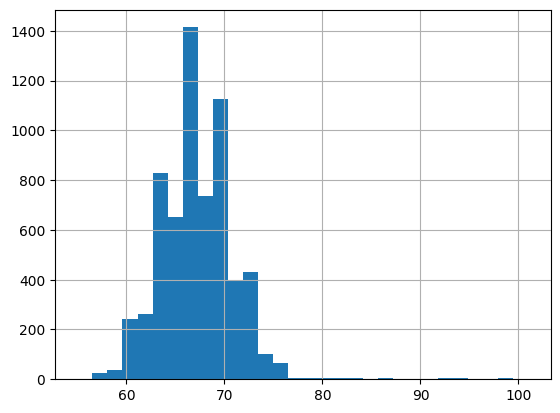

In [77]:
df['Exam_Score'].hist(bins=30)
plt.show()

## Estatística Básica

### Variáveis Numéricas


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.98546,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


### Variáveis Categóricas

In [ ]:
df.describe(include = 'string')

In [15]:
df.Parental_Involvement.value_counts(normalize = True)

Parental_Involvement
Medium    0.509721
High      0.287865
Low       0.202415
Name: proportion, dtype: float64

In [16]:
df.Access_to_Resources.value_counts(normalize = True)

Access_to_Resources
Medium    0.502352
High      0.297899
Low       0.199749
Name: proportion, dtype: float64

In [17]:
df.Extracurricular_Activities.value_counts(normalize = True)

Extracurricular_Activities
Yes    0.596896
No     0.403104
Name: proportion, dtype: float64

In [18]:
df.Motivation_Level.value_counts(normalize = True)

Motivation_Level
Medium    0.507526
Low       0.292255
High      0.200220
Name: proportion, dtype: float64

In [19]:
df.Internet_Access.value_counts(normalize = True)

Internet_Access
Yes    0.923957
No     0.076043
Name: proportion, dtype: float64

In [20]:
df.Family_Income.value_counts(normalize = True)
df.Teacher_Quality.value_counts(normalize = True)
df.School_Type.value_counts(normalize = True)

df.Peer_Influence.value_counts(normalize = True)
df.Learning_Disabilities.value_counts(normalize = True)
df.Parental_Education_Level.value_counts(normalize = True)

df.Distance_from_Home.value_counts(normalize = True)
df.Gender.value_counts(normalize = True)

Gender
Male      0.578238
Female    0.421762
Name: proportion, dtype: float64

# EDA utilizando Pandas

In [21]:
# df.rename(columns={'Exam_Score':'z_Exam_Score'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
#df.rename(columns={'z_Exam_Score':'Exam_Score'},inplace = True)

df.columns

Index(['Access_to_Resources', 'Attendance', 'Distance_from_Home', 'Exam_Score',
       'Extracurricular_Activities', 'Family_Income', 'Gender',
       'Hours_Studied', 'Internet_Access', 'Learning_Disabilities',
       'Motivation_Level', 'Parental_Education_Level', 'Parental_Involvement',
       'Peer_Influence', 'Physical_Activity', 'Previous_Scores', 'School_Type',
       'Sleep_Hours', 'Teacher_Quality', 'Tutoring_Sessions'],
      dtype='object')

<AxesSubplot:ylabel='Count'>

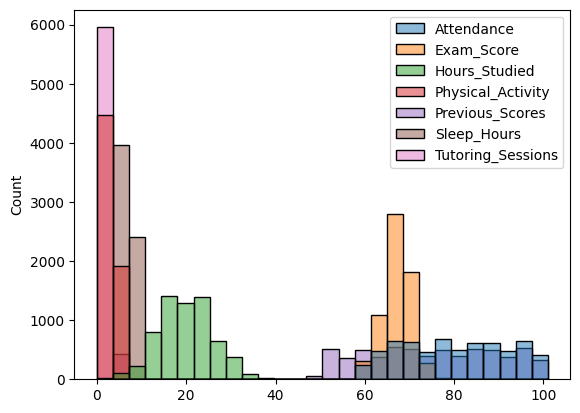

In [42]:
# fig, axes = plt.subplots(5, 5, figsize=(25, 16), sharey=False)
# fig.suptitle('Exam_Score Analysis')

sns.histplot(data=df)


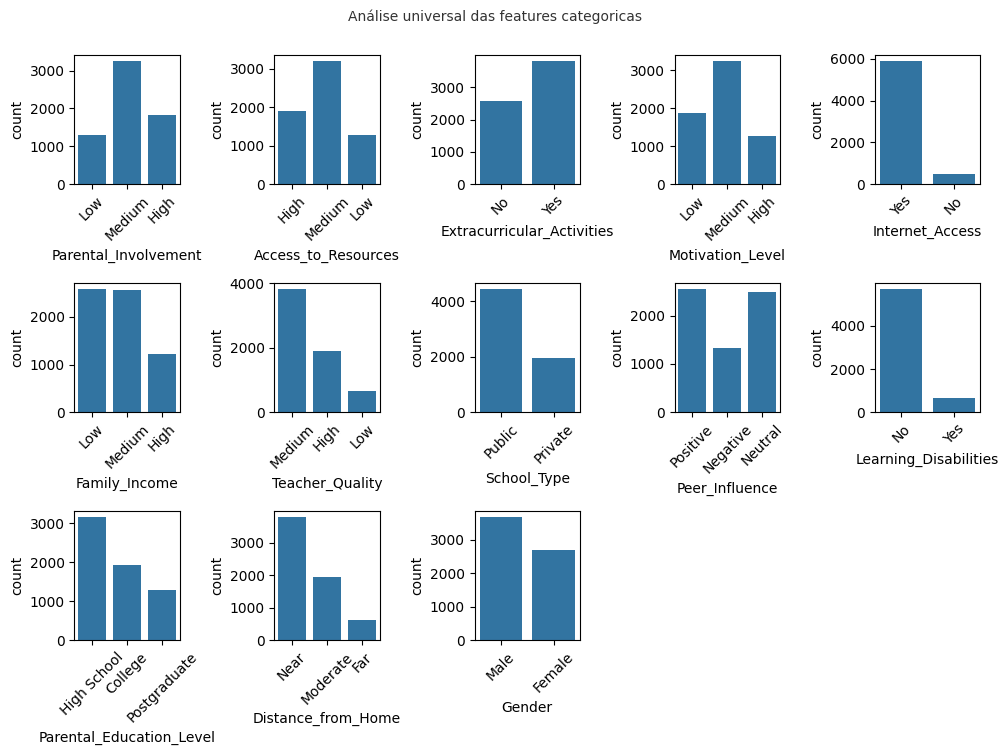

In [43]:
plt.figure(figsize=(10, 7.5))
plt.suptitle("Análise universal das features categoricas", 
             fontsize=10,
             alpha=0.8,
             y=1.)

cat1 = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level",
        "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence",
        "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"]

for i in range(len(cat1)):
    plt.subplot(3, 5, i+1)  # Ajuste para 3 linhas e 5 colunas
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### De acordo com os gráficos abaixo percebemos que tanto os alunos das escola pública como das escolas pariculares tiveram boas notas no exame.
### Entretando os alunos da escola particular possuem notas maiores no exame

<AxesSubplot:xlabel='School_Type', ylabel='Exam_Score'>

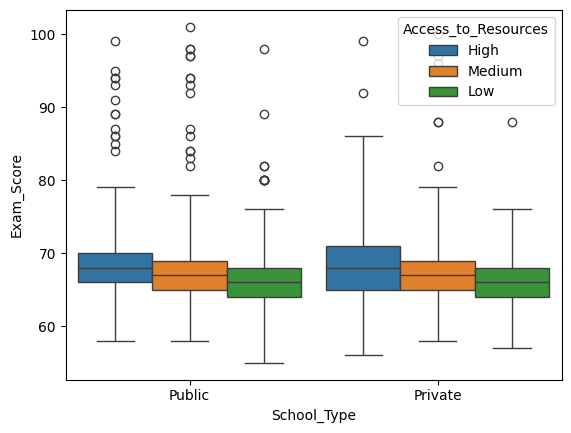

In [47]:
sns.boxplot(data=df, x="School_Type", y="Exam_Score", hue="Access_to_Resources", saturation=0.75, fill=True, dodge='auto', width=0.9,whis=2.5, linecolor='auto')

<AxesSubplot:xlabel='Distance_from_Home', ylabel='Exam_Score'>

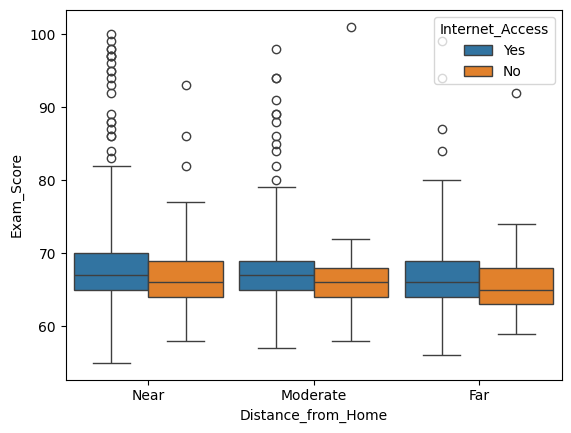

In [48]:
sns.boxplot(data=df, x="Distance_from_Home", y="Exam_Score", hue="Internet_Access", saturation=0.75, fill=True, dodge='auto', width=0.9,whis=2.5, linecolor='auto')

#### Podemos ver que o acesso à internet não influencia muito nas notas do exame :)

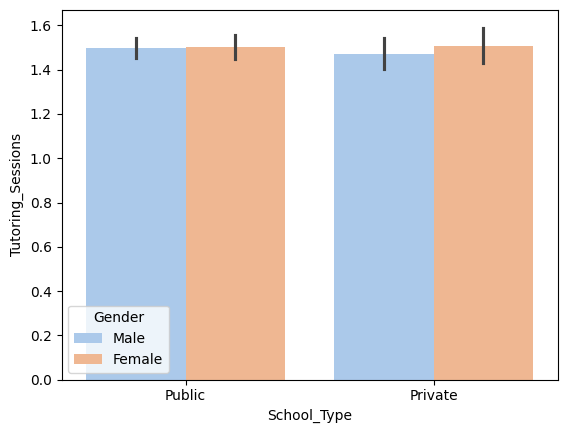

In [49]:
sns.barplot(x='School_Type', y='Tutoring_Sessions', data = df, hue='Gender', palette="pastel");

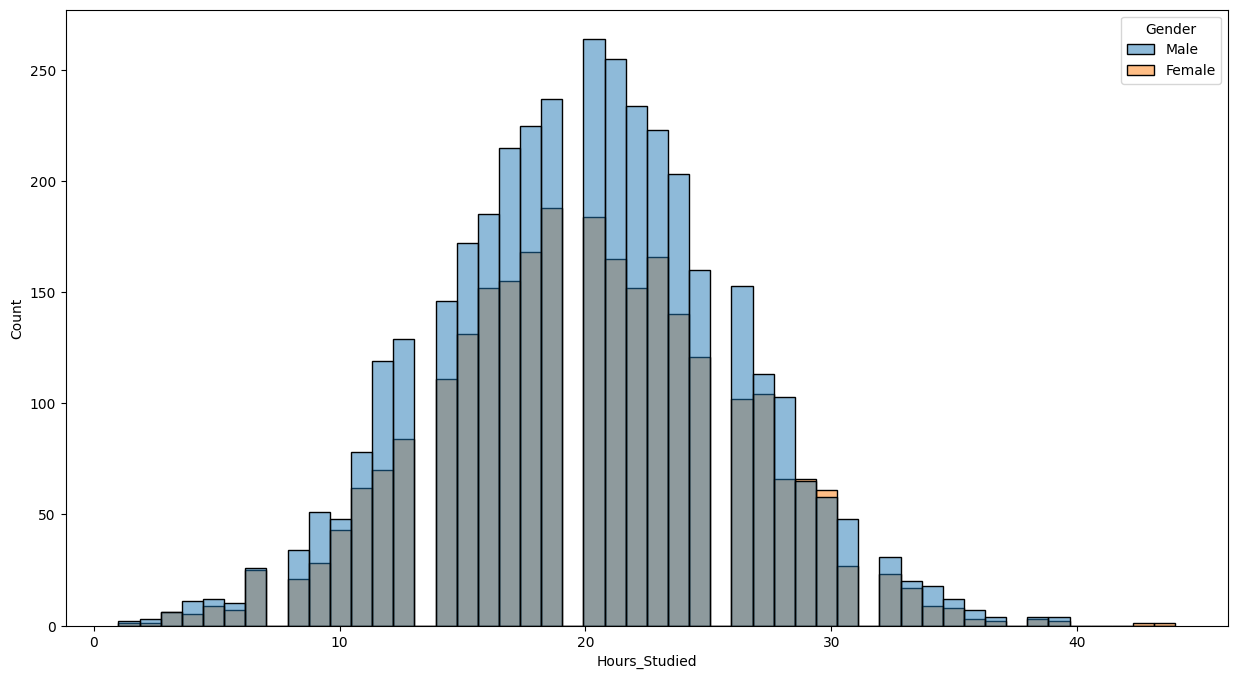

In [50]:
plt.figure(figsize=(15, 8))
sns.histplot(df, x='Hours_Studied', hue='Gender')


plt.show()

### Correlação das features numéricas em relação a Target

In [32]:
a = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions",
              "Physical_Activity", "Exam_Score"]]

Text(0.5, 1.0, 'Correlation Matrix')

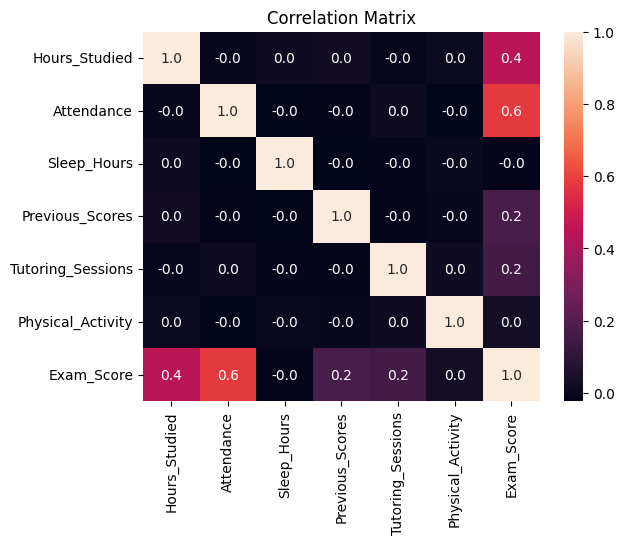

In [51]:
# Matriz de correlação
correlation_matrix = a.corr()

# Correlação de todas as colunas com a 'target'
target_correlation = correlation_matrix['Exam_Score'].sort_values(ascending=False)

plot = sns.heatmap(correlation_matrix, annot = True, fmt=".1f")
plot.set_title("Correlation Matrix")


### Interpretabilidade da matriz
#### Attendance: Correlação de 0.6, indicando uma forte correlação positiva. Isso sugere que quanto mais alta a presença do aluno, maior tende a ser sua nota no exame.
#### Hours_Studied: Correlação de 0.4, mostrando uma correlação positiva moderada. Estudar mais horas está relacionado a melhores notas no exame.
#### Tutoring_Sessions, Previous_Scores e Physical_Activity: Correlações de 0.2, sugerindo uma correlação fraca, mas ainda positiva. Participar de sessões de tutoria ou ter bons desempenhos anteriores pode ter um leve impacto positivo nas notas de exames.
#### Sleep_Hours: Correlação muito baixa e negativa -0.0, o que significa que o número de horas de sono praticamente não afeta as notas dos exames.

### Mas por que deixar variáveis com pouca correlação?

#### 1. Informação Contextual:
#### Features como Physical_Activity podem fornecer informações contextuais sobre o comportamento dos alunos, o que pode ser útil para entender um fenômeno mais amplo, mesmo que o impacto direto sobre Exam_Score seja baixo. Para análises interpretativas ou diagnósticas, essa informação pode ser relevante.
#### Além disso, manter essas features pode ser útil para identificar outliers ou segmentos específicos da população que se comportam de maneira diferente.
#### 2. Redundância e Robustez:
#### Em modelos preditivos, é comum manter algumas variáveis aparentemente fracas para garantir robustez ao modelo. Em situações futuras, ou em diferentes amostras, essas variáveis podem adquirir maior importância.
#### Se o conjunto de dados ou as características da população mudarem, features com baixa correlação atual podem se tornar mais importantes.

### Preparação do dataset para a modelagem

In [22]:
# backup do dataset
df_bkp = df.copy()

In [23]:
df = df_bkp

In [24]:
cat_LMH = ['Parental_Involvement', 'Access_to_Resources',
           'Motivation_Level', 'Family_Income', 'Teacher_Quality']

In [25]:
assortment_dict = {'Low': '1',  'Medium': '2', 'High': '3'}
df[cat_LMH] = df[cat_LMH].replace(assortment_dict )

In [26]:
for col in cat_LMH:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [27]:
cols_string = df.select_dtypes(include = 'object').columns
cols_string

Index(['Distance_from_Home', 'Extracurricular_Activities', 'Gender',
       'Internet_Access', 'Learning_Disabilities', 'Parental_Education_Level',
       'Peer_Influence', 'School_Type'],
      dtype='object')

In [28]:
df1 = pd.get_dummies(df, columns=cols_string)

In [29]:
df1

,Access_to_Resources,Attendance,Exam_Score,Family_Income,Hours_Studied,Motivation_Level,Parental_Involvement,Physical_Activity,Previous_Scores,Sleep_Hours,Teacher_Quality,Tutoring_Sessions,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Gender_Female,Gender_Male,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,School_Type_Private,School_Type_Public
0,3,84,67,1,23,1,1,3,73,7,2,0,False,False,True,True,False,False,True,False,True,True,False,False,True,False,False,False,True,False,True
1,2,64,61,2,19,1,1,4,59,8,2,2,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True
2,2,98,74,2,24,2,2,4,91,7,2,2,False,False,True,False,True,False,True,False,True,True,False,False,False,True,False,True,False,False,True
3,2,89,71,2,29,2,1,4,98,8,2,1,False,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True
4,2,92,70,2,19,2,2,4,65,6,3,3,False,False,True,False,True,True,False,False,True,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,2,69,68,3,25,2,3,2,76,7,2,1,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
6603,2,76,69,1,23,2,3,2,81,8,3,3,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
6604,1,90,68,1,20,1,2,2,65,6,2,3,False,False,True,False,True,True,False,False,True,True,False,False,False,True,True,False,False,False,True
6605,3,86,68,1,10,3,3,3,91,6,2,2,True,False,False,False,True,True,False,False,True,True,False,False,True,False,False,False,True,True,False


In [99]:
df1.dtypes

Access_to_Resources                    Int64
Attendance                             Int64
Distance_from_Home            string[python]
Exam_Score                             Int64
Extracurricular_Activities    string[python]
Family_Income                          Int64
Gender                        string[python]
Hours_Studied                          Int64
Internet_Access               string[python]
Learning_Disabilities         string[python]
Motivation_Level                       Int64
Parental_Education_Level      string[python]
Parental_Involvement                   Int64
Peer_Influence                string[python]
Physical_Activity                      Int64
Previous_Scores                        Int64
School_Type                   string[python]
Sleep_Hours                            Int64
Teacher_Quality                        Int64
Tutoring_Sessions                      Int64
dtype: object

In [30]:
cols_to_normalize = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']


In [31]:
df1_bkp = df1.copy()

In [32]:
df1

,Access_to_Resources,Attendance,Exam_Score,Family_Income,Hours_Studied,Motivation_Level,Parental_Involvement,Physical_Activity,Previous_Scores,Sleep_Hours,Teacher_Quality,Tutoring_Sessions,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Gender_Female,Gender_Male,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,School_Type_Private,School_Type_Public
0,3,84,67,1,23,1,1,3,73,7,2,0,False,False,True,True,False,False,True,False,True,True,False,False,True,False,False,False,True,False,True
1,2,64,61,2,19,1,1,4,59,8,2,2,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True
2,2,98,74,2,24,2,2,4,91,7,2,2,False,False,True,False,True,False,True,False,True,True,False,False,False,True,False,True,False,False,True
3,2,89,71,2,29,2,1,4,98,8,2,1,False,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True
4,2,92,70,2,19,2,2,4,65,6,3,3,False,False,True,False,True,True,False,False,True,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,2,69,68,3,25,2,3,2,76,7,2,1,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
6603,2,76,69,1,23,2,3,2,81,8,3,3,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
6604,1,90,68,1,20,1,2,2,65,6,2,3,False,False,True,False,True,True,False,False,True,True,False,False,False,True,True,False,False,False,True
6605,3,86,68,1,10,3,3,3,91,6,2,2,True,False,False,False,True,True,False,False,True,True,False,False,True,False,False,False,True,True,False


In [33]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()
df1[cols_to_normalize] = scaler.fit_transform(df1[cols_to_normalize])

In [33]:
df1

,Access_to_Resources,Attendance,Exam_Score,Family_Income,Hours_Studied,Motivation_Level,Parental_Involvement,Physical_Activity,Previous_Scores,Sleep_Hours,Teacher_Quality,Tutoring_Sessions,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Gender_Female,Gender_Male,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,School_Type_Private,School_Type_Public
0,3,0.600,67,1,0.511628,1,1,0.500000,0.46,0.500000,2,0.000,False,False,True,True,False,False,True,False,True,True,False,False,True,False,False,False,True,False,True
1,2,0.100,61,2,0.418605,1,1,0.666667,0.18,0.666667,2,0.250,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True
2,2,0.950,74,2,0.534884,2,2,0.666667,0.82,0.500000,2,0.250,False,False,True,False,True,False,True,False,True,True,False,False,False,True,False,True,False,False,True
3,2,0.725,71,2,0.651163,2,1,0.666667,0.96,0.666667,2,0.125,False,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True
4,2,0.800,70,2,0.418605,2,2,0.666667,0.30,0.333333,3,0.375,False,False,True,False,True,True,False,False,True,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,2,0.225,68,3,0.558140,2,3,0.333333,0.52,0.500000,2,0.125,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
6603,2,0.400,69,1,0.511628,2,3,0.333333,0.62,0.666667,3,0.375,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True
6604,1,0.750,68,1,0.441860,1,2,0.333333,0.30,0.333333,2,0.375,False,False,True,False,True,True,False,False,True,True,False,False,False,True,True,False,False,False,True
6605,3,0.650,68,1,0.209302,3,3,0.500000,0.82,0.333333,2,0.250,True,False,False,False,True,True,False,False,True,True,False,False,True,False,False,False,True,True,False


### TRAIN TEST SPLIT

In [55]:
X = df1.drop('Exam_Score', axis = 1)
y = df1['Exam_Score']

In [56]:
# Train Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)
# ytrain = ytrain.astype('int')
# ytest = ytest.astype('int')

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(4464, 30)
(4464,)
(1914, 30)
(1914,)


* A partir daqui serão testados diferentes modelos com diferentes combinações de hiperparâmetros para verificar qual apresenta melhor métrica de classificação.

In [57]:
# bibliotecas para avaliar as métricas do modelo

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [37]:
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

#### Modelo 01 - Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(Xtrain, ytrain)
y_pred_dt = model_dt.predict(Xtest)

In [39]:
mse = mean_squared_error(ytest,y_pred_dt, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ytest,y_pred_dt)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 13.549111807732498
RMSE: 3.6809118174349815
MAPE: 0.026745842682710408


#### Modelo 02 - Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(Xtrain, ytrain)
ypred_lr = model_lr.predict(Xtest)


In [41]:
mse = mean_squared_error(ytest,ypred_lr, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ytest,ypred_lr)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 4.071261510579937
RMSE: 2.017736729749433
MAPE: 0.006424001836606048


#### Modelo 03 - K-NN Regressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=7, metric='euclidean')
model_knn.fit(Xtrain, ytrain)
y_pred_knn = model_knn.predict(Xtest)


In [43]:
mse = mean_squared_error(ytest,y_pred_knn, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ytest,y_pred_knn)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 12.673544025760773
RMSE: 3.5599921384408666
MAPE: 0.03710582318830476


#### Modelo 04 - Support Vector Machine

In [44]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(Xtrain, ytrain)
y_pred_svr = model_svr.predict(Xtest)

In [45]:
mse = mean_squared_error(ytest,y_pred_svr, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ytest,y_pred_svr)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 4.157739702346871
RMSE: 2.039053629100243
MAPE: 0.007359995410706704


#### Modelo 05 - XGBoost

In [46]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(Xtrain, ytrain)
y_pred_xgb = model_xgb.predict(Xtest)

In [47]:
mse = mean_squared_error(ytest,y_pred_svr, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ytest,y_pred_xgb)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 4.157739702346871
RMSE: 2.039053629100243
MAPE: 0.014775889748670522


#### Modelo 05 - Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(Xtrain, ytrain)
y_pred_rf = model_rf.predict(Xtest)

In [53]:
mse = mean_squared_error(ytest,y_pred_rf, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ytest,y_pred_rf)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 6.653605015673981
RMSE: 2.57945827949862
MAPE: 0.021099436412473898


### Desses modelos acima testados, os que tiveram as melhores métricas foram:  
### - Deciosion Tree  
### - KNN Regressor
### - Random Forest

In [50]:
# Calculando os resíduos
residuals = ytest - y_pred_rf
X['Residuals'] = residuals

# Correlação entre os resíduos e as variáveis de entrada
correlation_matrix_residuals = X.corr()
print(correlation_matrix_residuals['Residuals'].sort_values(ascending=False))

Residuals                                1.000000
Hours_Studied                            0.191128
Tutoring_Sessions                        0.164513
Attendance                               0.160621
Access_to_Resources                      0.158784
Parental_Involvement                     0.148607
Family_Income                            0.096530
Previous_Scores                          0.091394
Teacher_Quality                          0.083204
Parental_Education_Level_Postgraduate    0.073664
Peer_Influence_Positive                  0.071169
Motivation_Level                         0.069398
Distance_from_Home_Near                  0.067952
Learning_Disabilities_No                 0.064167
Internet_Access_Yes                      0.056708
Physical_Activity                        0.046211
Parental_Education_Level_College         0.042701
Extracurricular_Activities_Yes           0.041356
Gender_Female                            0.018625
School_Type_Public                       0.018312


Após o treino é possivel observar como a importancia de algumas variavéis foram alteradas, exemplo o genero, é observado que o genero feminino possui notas maiores em relação ao sexo masculino.

### Feature importances de Decision Tree

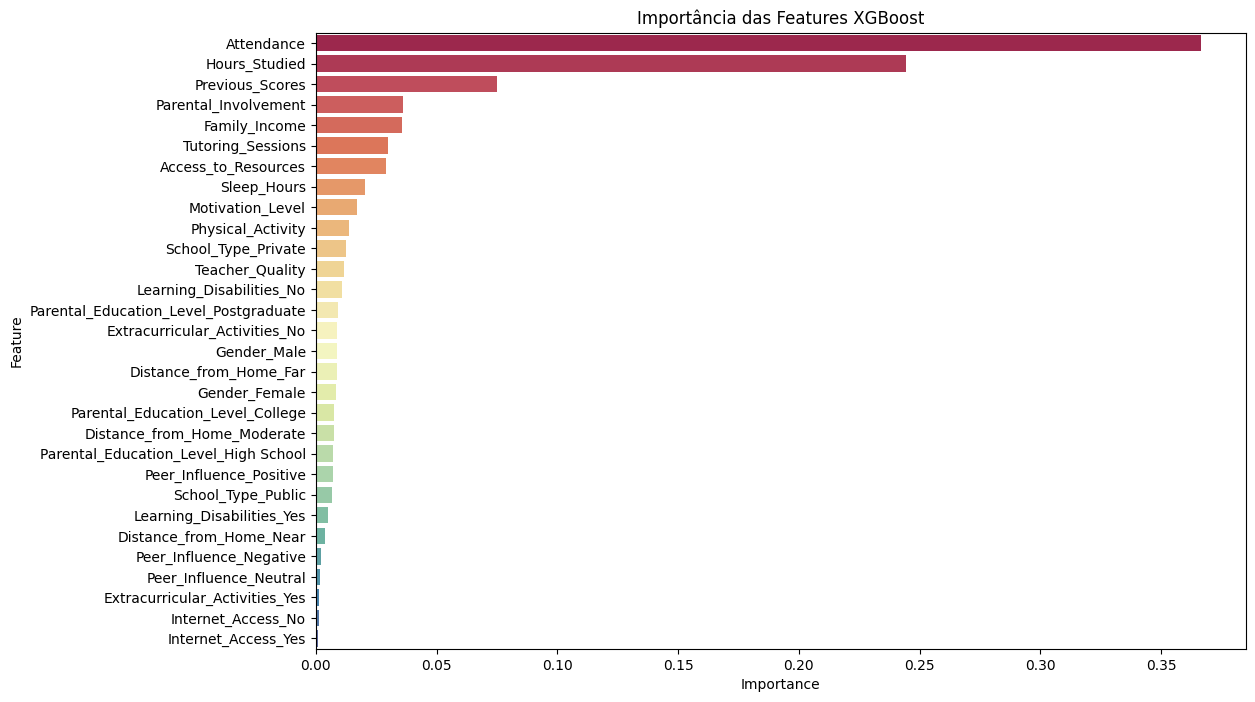

In [58]:
# Obtendo a importância das features
feature_importance = model_dt.feature_importances_

# Criando um DataFrame para visualização
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Spectral')
plt.title('Importância das Features XGBoost')
plt.show()

### Feature importances de Random Forest

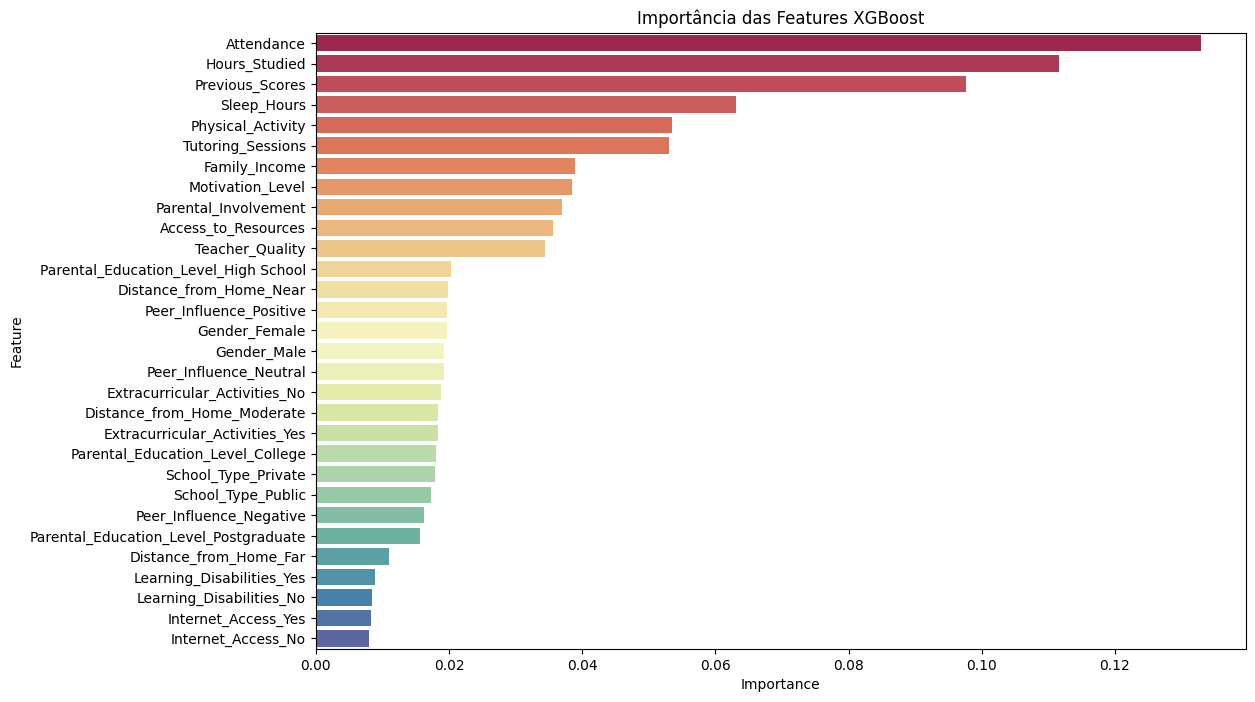

In [59]:
# Obtendo a importância das features
feature_importance = model_rf.feature_importances_

# Criando um DataFrame para visualização
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Spectral')
plt.title('Importância das Features XGBoost')
plt.show()

## Otimização e Ajuste Fino

Vamos utilizar o GridSearch para selecionar os melhores hiperparametros para obtermos a melhor combinação para um melhor resultado do treinamento do modelo

In [60]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inicializar o classificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Realizar a busca em grade para encontrar os melhores parâmetros
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(Xtrain, ytrain)

# Utilizar o modelo com os melhores parâmetros
best_rf_classifier = grid_search.best_estimator_

# Treinar o modelo com todos os dados de treinamento
best_rf_classifier.fit(Xtrain, ytrain)
 
# Prever os rótulos para os dados de teste
y_pred = best_rf_classifier.predict(Xtest)

In [65]:
# Exibir os melhores parâmetros encontrados
print("Melhores Parâmetros Encontrados:")
print(grid_search.best_params_)

Melhores Parâmetros Encontrados:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [66]:
mse = mean_squared_error(ytest,y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(ytest,y_pred)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 6.03239289446186
RMSE: 2.4560930142121777
MAPE: 0.01840180625444673


### Testando o modelo com validação cruzada

In [63]:
from sklearn.model_selection import cross_val_score

modelo_RFC_cv = RandomForestClassifier(class_weight='balanced',
                                       n_estimators= 200,
                                       max_depth= 8,
                                       random_state=42)

scores = cross_val_score(best_rf_classifier, Xtrain, ytrain, cv=10, scoring='accuracy')

print(scores)
print("Acurácia média com validação cruzada:", scores.mean())

[0.25279642 0.27069351 0.27516779 0.29530201 0.28699552 0.29596413
 0.27578475 0.26457399 0.26681614 0.26008969]
Acurácia média com validação cruzada: 0.27441839467902607
